In [2]:
from glob import glob

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

import librosa, librosa.display
import IPython.display as ipd  #Easy Access Audio Player Libary

In [3]:
data_dir = "Audio Files"
audio_files = glob(data_dir +  "/*.wav")

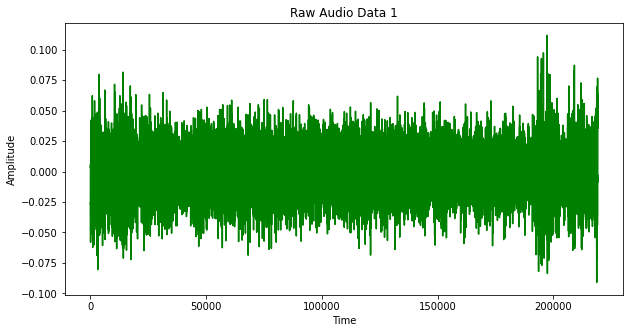

In [17]:
signal, sr = librosa.load(audio_files[1],sr=22050)


pd.Series(signal).plot(figsize=(10,5), xlabel ="Time",ylabel ="Amplitude",title="Raw Audio Data 1" ,color ="green")
plt.show()

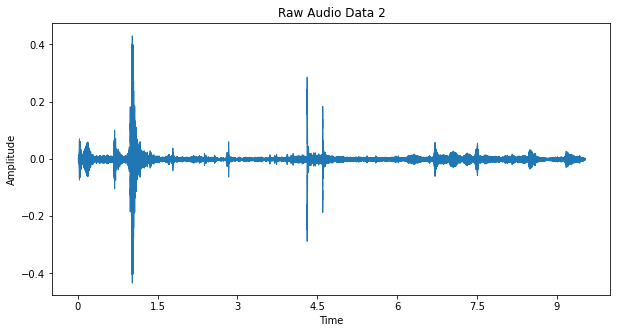

In [5]:
signal2, sr = librosa.load(audio_files[3],sr=22050)
plt.figure(figsize=(10,5))
librosa.display.waveshow(signal2,sr=sr)
plt.title("Raw Audio Data 2")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

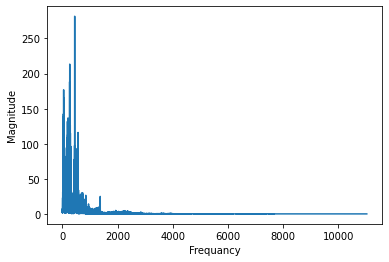

<Figure size 720x360 with 0 Axes>

In [6]:
fft = np.fft.fft(signal) 

srlen = len(np.abs(fft)) # About sr = 22050 

magnitude = np.abs(fft)[:int(srlen/2)]
frequancy = np.linspace(0,sr, srlen)[:int(srlen/2)]

plt.plot(frequancy,magnitude) 
plt.xlabel("Frequancy")
plt.ylabel("Magnitude")
plt.figure(figsize=(10,5))
plt.show()


In [11]:
n_fft = 2050 #n_fft ~= srlen
framesize= 512 

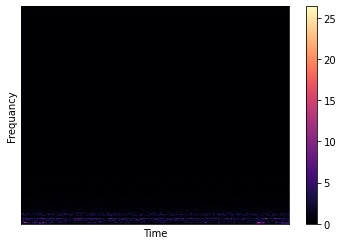

In [12]:
stft = librosa.core.stft(signal, hop_length=framesize , n_fft=n_fft)  
stft = np.abs(stft)    #2D -> 1D array complex values


librosa.display.specshow(stft, hop_length=framesize, n_fft =n_fft)
plt.xlabel("Time")
plt.ylabel("Frequancy")
plt.colorbar()
plt.show()

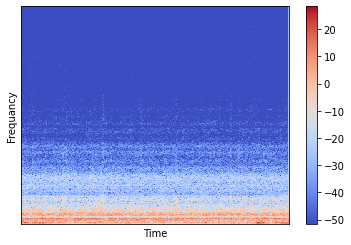

In [16]:
log_spectogram = librosa.amplitude_to_db(stft)
"""
The perception of the sound intensity is more manageable in db which is type of 
logarithmic scale basically.

Humans can detect sounds in 20Hz-20kHz or 0-140db
Lineear observation is not effective

"""
librosa.display.specshow(log_spectogram, hop_length=framesize, n_fft =n_fft)
plt.xlabel("Time")
plt.ylabel("Frequancy")
plt.colorbar()
plt.show()